# ***` Logistic Regression `***

***` Import the Iris data which discusses about three species of flowers namely "Setosa","Verisicolor" and "Virginica" Your task is to build a logistic regression model to distinguish between two  of these speicies using features like "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width"`***

`1)Write a sigmoid function and visualize the sigmoid function,by considering x in the range of (-10,10).`

`2)Plot impact of logloss for single forecasts (You can import log_loss from sklearn.metrics). Make predictions as 0 to 1 in 0.01 increments. (For example,yhat = [x*0.01 for x in range(0, 101)]).Evaluate predictions for a 0 true value.Plot a graph between y_hat and log_loss`

`3)Find the difference between minimum log loss for label 0 and label 1 [1.5 marks]`

`3)Import the Iris Data, and visualize the data to an idea about it.`

`4)Convert the char labels to numerical as logistic regression takes only 0's and 1's and then create new array of numerical labels.After following the procedure as mentioned in the comments , find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1).[1 marks]`

`5)Split the data in X,y and convert them into arrays`

`6)Use sklearn to split the data (**Important** Consider random_state=42 and test_size=0.2)and perform Logistic Regression`

`7)Find the weights and bias and save it in a list[5 marks]`

`8)Make a prediction on the test data.Find the accuracy of the prediction.[1 marks]`

`9)Also predict the species of the flower whose sepal length=4.9cm	sepal width=4cm	petal length=1.2cm	petal width=0.4cm and return the Species of the data.[1.5 marks]`


In [28]:
# Run this cell
# import important libraries library
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ans = [None]*5

# ***`Importing and Visualizing Data`***



In [29]:
#Sigmoid Function
#def sigmoid(x):
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


[4.53978687e-05 5.55606489e-05 6.79983174e-05 8.32200197e-05
 1.01848815e-04 1.24647146e-04 1.52547986e-04 1.86692945e-04
 2.28478855e-04 2.79614739e-04 3.42191434e-04 4.18766684e-04
 5.12469082e-04 6.27124987e-04 7.67413430e-04 9.39055039e-04
 1.14904229e-03 1.40591988e-03 1.72012560e-03 2.10440443e-03
 2.57431039e-03 3.14881358e-03 3.85103236e-03 4.70911357e-03
 5.75728612e-03 7.03711536e-03 8.59898661e-03 1.05038445e-02
 1.28252101e-02 1.56514861e-02 1.90885420e-02 2.32625358e-02
 2.83228820e-02 3.44451957e-02 4.18339400e-02 5.07243606e-02
 6.13831074e-02 7.41067363e-02 8.92170603e-02 1.07052146e-01
 1.27951705e-01 1.52235823e-01 1.80176593e-01 2.11963334e-01
 2.47663801e-01 2.87185901e-01 3.30246430e-01 3.76354517e-01
 4.24816868e-01 4.74768924e-01 5.25231076e-01 5.75183132e-01
 6.23645483e-01 6.69753570e-01 7.12814099e-01 7.52336199e-01
 7.88036666e-01 8.19823407e-01 8.47764177e-01 8.72048295e-01
 8.92947854e-01 9.10782940e-01 9.25893264e-01 9.38616893e-01
 9.49275639e-01 9.581660

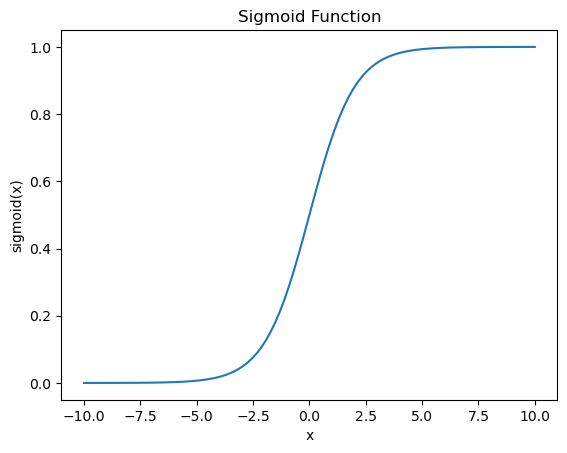

In [30]:
#Visualize sigmoid function
#Create an array of x_val with values between -10 and 10 
x = np.linspace(-10, 10, 100)
#Find y_val, by using sigmoid function
y_sig = sigmoid(x)
print(y_sig)
#Plot x_val,y_val and label the graph
plt.plot(x, y_sig)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9172\3505578429.py:7: RuntimeWarning: divide by zero encountered in log
  y_true1 = 0-np.log(y_hat)


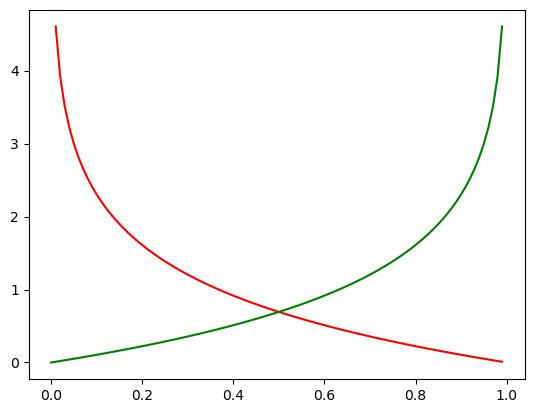

In [47]:
# plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
# predictions as 0 to 1 in 0.01 increments
y_hat = np.arange(0, 1, 0.01)

# evaluate predictions for a 0 true value
y_true1 = 0-np.log(y_hat)


# evaluate predictions for a 1 true value
y_true0 = 0-np.log(1-y_hat)



# plot input to loss
plt.plot(y_hat,y_true1,'r',label='y=1')
plt.plot(y_hat,y_true0,'g',label='y=0')
plt.legend()
plt.show()

In [32]:
#Find the difference between minimum log loss for label 0 and label 1 
y_true0[99]-y_true1[0]

-inf

# ***`Processing the Data`***

In [33]:
#Import the dataset of iris from datasets.load_iris()
data = pd.read_csv('Iris.csv')

In [34]:
#Look into the top 5 rows of data
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


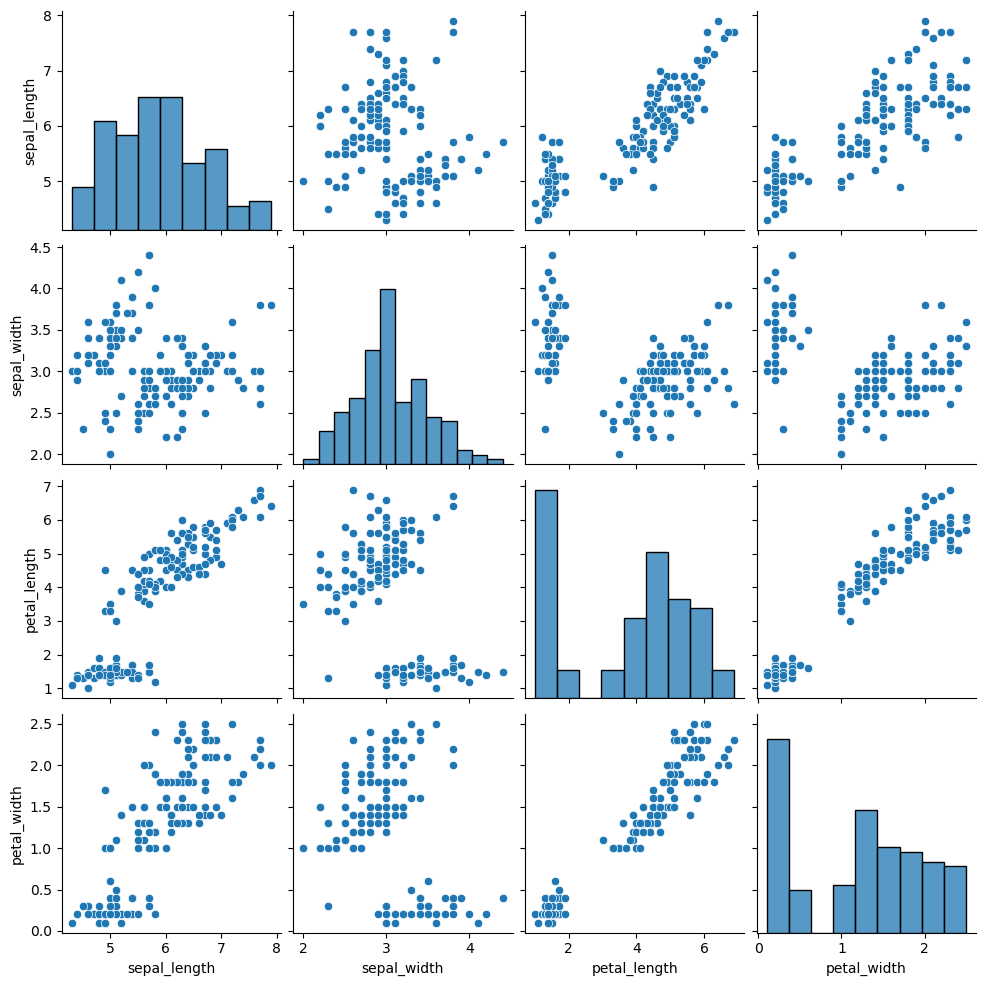

In [35]:
#Visualize  the data using seaborn pairplot
new_data = sns.load_dataset('iris')

sns.pairplot(new_data)
plt.show()

In [36]:
# Convert char labels into numerical 
#import LabelEncoder which returns array of encoded labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Create new array of numerical labels
char_data=le.fit_transform(data['Species'])
char_data.shape

(150,)

In [37]:
# Drop old labels(char) data 
data.drop(['Species'],axis=1,inplace=True)
# Substitute new labels(numerical) into data
df=pd.DataFrame(char_data, columns=['Species'])
data=pd.concat([data,df],axis=1)

In [38]:
# Logistic regression only takes the data which has labels 0 and 1, so consider only data['labels']<2
# Considering Iris-setosa as "0" and Iris-versicolor as "1"
new_data= data.iloc[0:100,:]
new_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
95,96,5.7,3.0,4.2,1.2,1
96,97,5.7,2.9,4.2,1.3,1
97,98,6.2,2.9,4.3,1.3,1
98,99,5.1,2.5,3.0,1.1,1
99,100,5.7,2.8,4.1,1.3,1


In [39]:
#Find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1)
d1= new_data.iloc[0:50,1:2]
d2= new_data.iloc[50:100,1:2]
print(d1.mean()-d2.mean())

SepalLengthCm   -0.93
dtype: float64


# ***`Obtaining Weight Values`***

In [40]:
# Split the data into X and y
y= new_data.iloc[:,5:]
X=new_data.drop(['Id','Species'],axis=1)


In [41]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


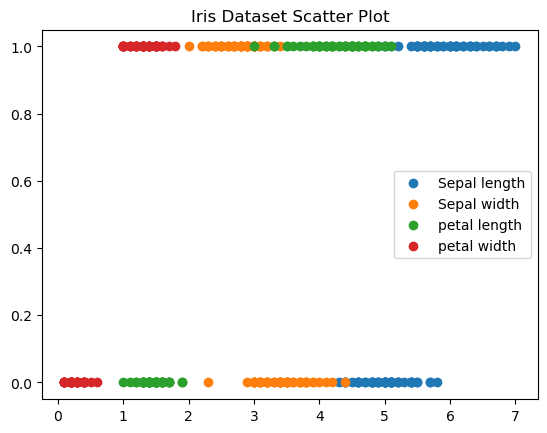

In [51]:
# Visualize X,y

X1=X.iloc[:,0]
X2=X.iloc[:,1]
X3=X.iloc[:,2]
X4=X.iloc[:,3]
plt.title('Iris Dataset Scatter Plot')
plt.scatter(X1,y,label = 'Sepal length')
plt.scatter(X2,y,label = 'Sepal width')
plt.scatter(X3,y,label = 'petal length')
plt.scatter(X4,y,label = 'petal width')
plt.legend()
plt.show()

In [ ]:
# Convert X,y into arrays
X= X.to_numpy()
y= y.to_numpy()
len(X)

100

In [ ]:
#Using sklearn to split the data
from sklearn.model_selection import train_test_split
#Take the test size as 0.2 and random_state as 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Importing Necessary Libraries for Logistic Regression 
from sklearn.linear_model import LogisticRegression
#Building our model
lr = LogisticRegression()
#Finding the parameter and bias
lr.fit(X_train,y_train)

c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
#Printing the parameters and bias
coefficients = lr.coef_
intercept = lr.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [[ 0.45814597 -0.83206176  2.21926247  0.93030347]]
Intercept: [-6.56399035]


In [ ]:
#Save parameters and bias [w1,w2,w3,w4,b] as one vector 
#i.e if the answer should be in a 1 dimensional list
coeff  = np.ravel(coefficients)
combined_array = np.concatenate((coeff,intercept))
print(combined_array)

[ 0.45814597 -0.83206176  2.21926247  0.93030347 -6.56399035]


In [ ]:
#Predicitng on our test data
y_pred=lr.predict(X_test)

In [ ]:
#Finding the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
#Predict for the input [4.9,4,1.2,0.4] , save the answer ans[4] "Setosa" or "Versicolor"
test1= [[4.9,4,1.2,0.4] ]
result1= lr.predict(test1)

In [ ]:
#The class of the input 
print(result1)

[0]


In [ ]:
# Run the this cell to submit your answers and get score evaluated"
# Do not make any changes in this cell
# Simply execute it and move on

ans = [item for item in ans]
with open('ans.json', 'w') as f:
    json.dump(ans, f)
! ~/submit

NameError: name 'json' is not defined